In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score

In [7]:
wine_data=pd.read_csv('winequality-red.csv')

# Data Analysis

In [12]:
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
wine_data.isnull().sum() #no column empty phsshh

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

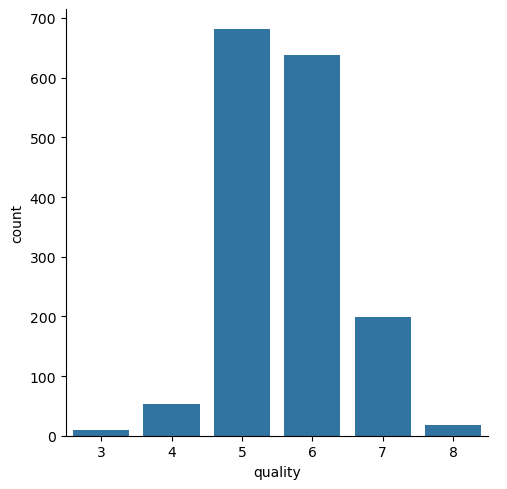

In [30]:
#checking how many values correspond to each quality
sns.catplot(x='quality',kind='count',data=wine_data)

## Wine Quality max in 5-6

<Axes: xlabel='quality', ylabel='volatile acidity'>

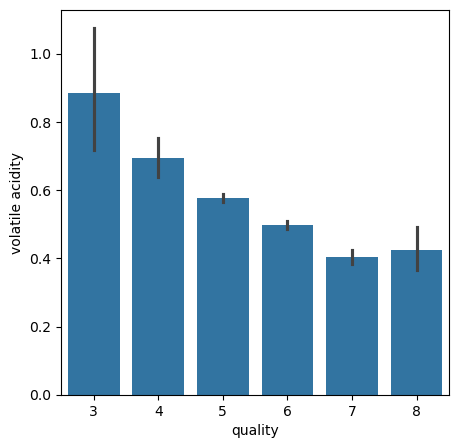

In [33]:
#checking for the volatile acidity vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

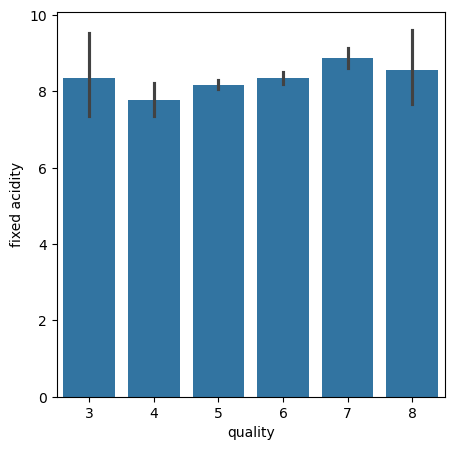

In [37]:
#fixed acidity vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

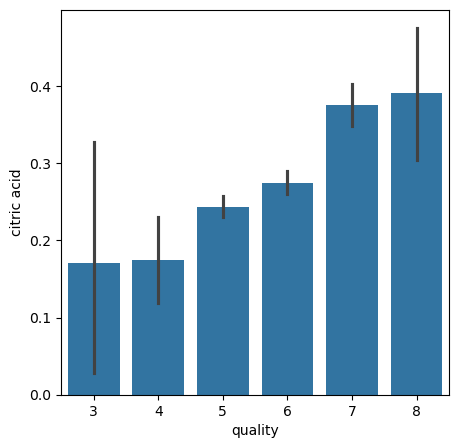

In [39]:
#citric acid vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

<Axes: xlabel='quality', ylabel='residual sugar'>

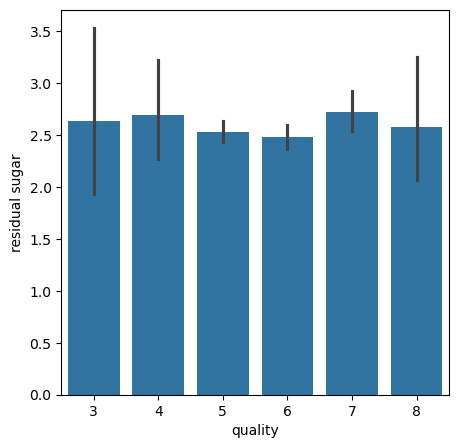

In [41]:
#residual sugar vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

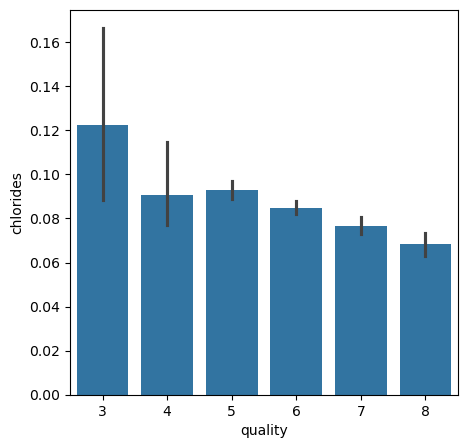

In [43]:
#chlorides vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

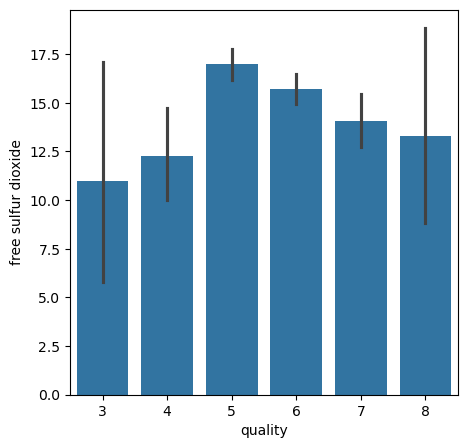

In [45]:
#free sulfur dioxide vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

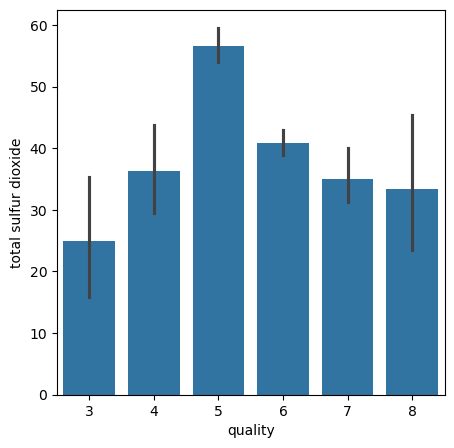

In [49]:
#total sulfur dioxide	 vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data)

<Axes: xlabel='quality', ylabel='density'>

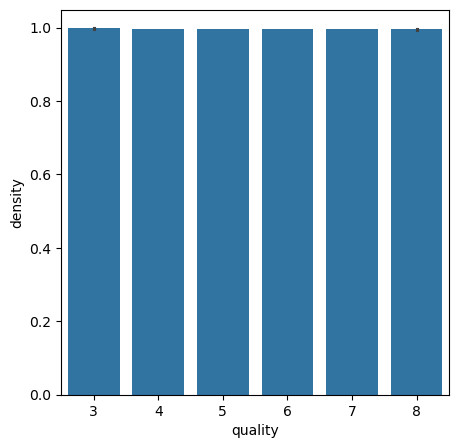

In [51]:
#density	 vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wine_data)

<Axes: xlabel='quality', ylabel='pH'>

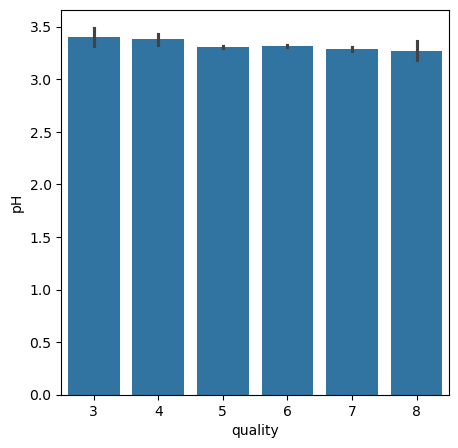

In [57]:
#ph vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=wine_data)

<Axes: xlabel='quality', ylabel='sulphates'>

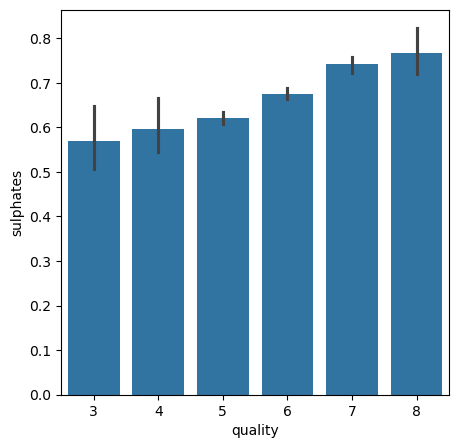

In [59]:
#	sulphates vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=wine_data)

<Axes: xlabel='quality', ylabel='alcohol'>

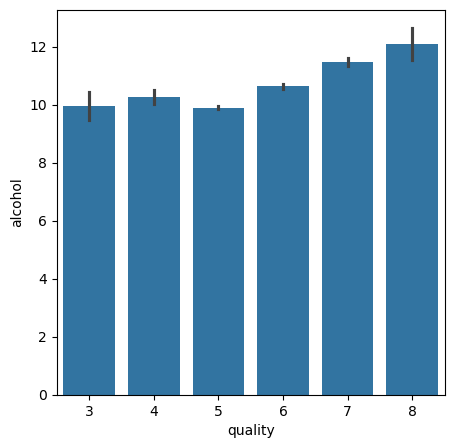

In [61]:
#	alcohol vs wine quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_data)

# Checking the proportioanlity through a correlation heat map

In [64]:
correlation=wine_data.corr()

<Axes: >

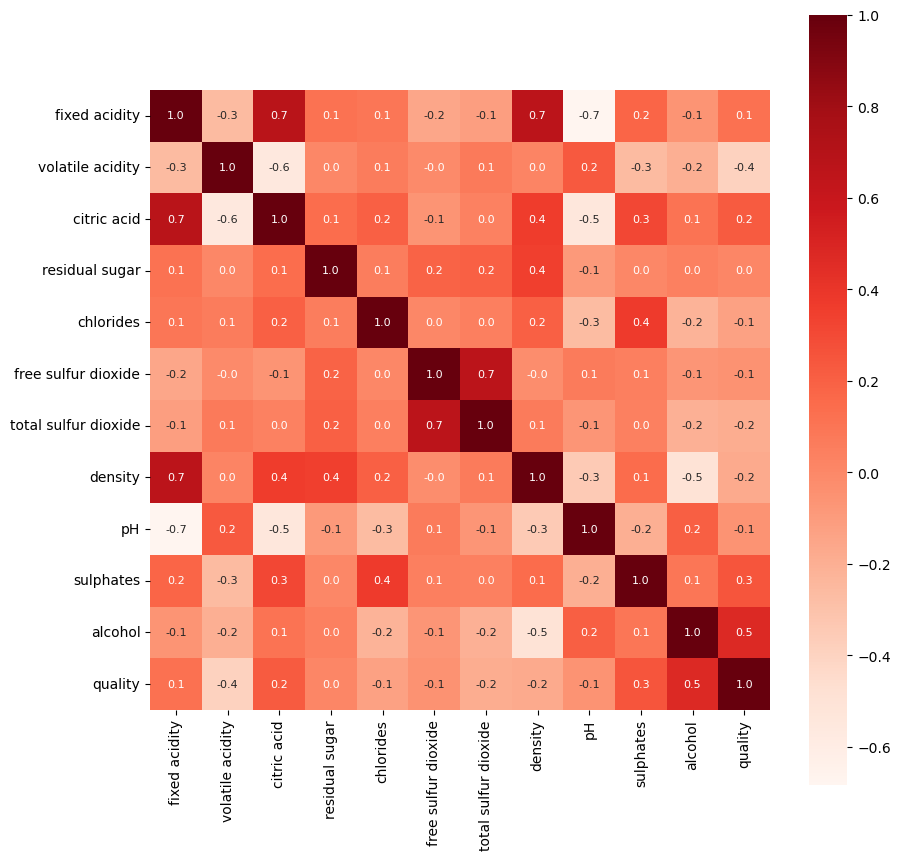

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

# Some Inferences that can be drawn from column of quality 
## 1) Alcohol has a positive correlation of 0.5 with the quality 
## 2) Volatile Acidity has a negative correlation of 0.4 with the quality

# Some DATA preprocessing 

In [86]:
#splitting the data in input and output(quality)  values
X= wine_data.drop('quality',axis=1)

In [92]:
# we will convert the quality in binary labels such that the wine having quality>=7 is good and rest is bad
# for this we use Binary Labelisation
Y=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)


In [94]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [96]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [98]:
#splitting the train_test_data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

# Training the Model

In [101]:
model=RandomForestClassifier()

In [103]:
model.fit(X_train,Y_train)

RandomForestClassifier()

# Evaluating the model


In [106]:
prediction=model.predict(X_test)

In [108]:
accuracy_score=accuracy_score(prediction,Y_test)

In [112]:
print("Accuracy is :",accuracy_score*100)

Accuracy is : 91.5


# Taking input for prediction

In [141]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,20)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Good Quality Wine


C:\Users\bishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(11,)

SyntaxError: invalid syntax (3125188963.py, line 1)